## Aesthetics

- We'll focus on how to use data visualization to communicate insights and tell stories.
- We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand.

### Introduction to the Data

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

__Source:__ Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available <a href="http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv">here</a>

The dataset was compiled to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

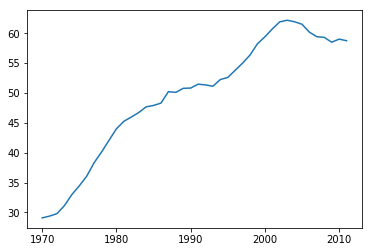

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

x_values = women_degrees['Year']
y_values = women_degrees['Biology']

plt.plot(x_values, y_values)
plt.show()

Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987.

While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

### Visualizing The Gender Gap

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`. Once we have the male percentages, we can generate two line charts as part of the same diagram.

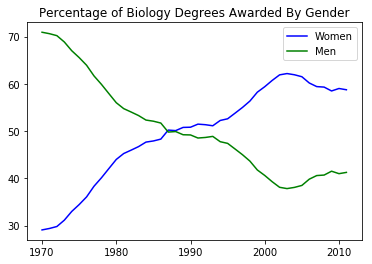

In [4]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100 - women_degrees['Biology'], c='green', label="Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect.

### Data-Ink Ratio

We're interested in helping people understand the gender gap in different fields across time.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. These excess elements, sometimes known as __chartjunk__, increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the __data-ink ratio__, which is the fractional amount of the plotting area dedicated to displaying the data.

<img src="_images/data-ink.gif" />

- __Non-data ink__ includes any elements in the chart that don't directly display data points.
    - This includes tick markers, tick labels, and legends.
- __Data ink__ includes any elements that display and depend on the data points underlying the chart.
    - In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers.
    
As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots.

To improve the data-ink ratio, let's make the following changes to the plot we created:
- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.

### Hiding Tick Marks

To customize the appearance of the ticks, we use the `Axes.tick_params()` method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:
- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:
- `bottom`: `"False"`
- `top`: `"False"`
- `left`: `"False"`
- `right`: `"False"`

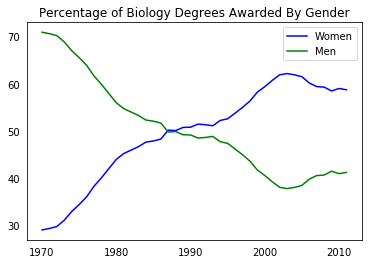

In [6]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100 - women_degrees['Biology'], c='green', label='Men')
plt.tick_params(bottom="False", top="False", left="False", right="False")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

### Hiding Spines

